In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('output.csv', sep=', ')

In [2]:
df.head()

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
0,knapPI_1_100_10000_100,KNAPSACK_HEURISTICS,uncorrelated,100,500453,504541,504541,0,20
1,knapPI_1_1000_10000_100,KNAPSACK_HEURISTICS,uncorrelated,1000,4881651,4961864,4942158,19706,28
2,knapPI_1_100_10000_100,KNAPSACK_LOCAL_SEARCH_FLIP,uncorrelated,100,500453,504541,498719,5822,99
3,knapPI_1_10000_10000_100,KNAPSACK_HEURISTICS,uncorrelated,10000,49805376,50106947,49886890,220057,260
4,knapPI_1_1000_10000_100,KNAPSACK_LOCAL_SEARCH_FLIP,uncorrelated,1000,4881651,4961864,4939244,22620,271


In [3]:
df[df['Obtained'] == -1]

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
46,knapPI_1_10000_10000_100,KNAPSACK_DP,uncorrelated,10000,49805376,50106947,-1,50106948,9223372036854775807
47,knapPI_1_5000_10000_100,KNAPSACK_DP,uncorrelated,5000,24764954,25058087,-1,25058088,9223372036854775807
50,knapPI_2_10000_10000_100,KNAPSACK_DP,weakly correlated,10000,49805376,50229348,-1,50229349,9223372036854775807
75,knapPI_2_5000_10000_100,KNAPSACK_DP,weakly correlated,5000,24764954,24994675,-1,24994676,9223372036854775807
86,knapPI_2_500_10000_100,KNAPSACK_GRASP,weakly correlated,500,2416099,2446272,-1,2446273,9223372036854775807
88,knapPI_3_10000_10000_100,KNAPSACK_DP,strongly correlated,10000,49576995,59526995,-1,59526996,9223372036854775807
96,knapPI_3_5000_10000_100,KNAPSACK_DP,strongly correlated,5000,24642572,29617572,-1,29617573,9223372036854775807
111,knapPI_3_500_10000_100,KNAPSACK_GRASP,strongly correlated,500,2373274,2870274,-1,2870275,9223372036854775807
112,knapPI_4_10000_10000_100,KNAPSACK_DP,inverse strongly correlated,10000,59477985,49958985,-1,49958986,9223372036854775807
122,knapPI_4_5000_10000_100,KNAPSACK_DP,inverse strongly correlated,5000,29593067,24833067,-1,24833068,9223372036854775807


In [4]:
df = df[df['Obtained'] != -1]

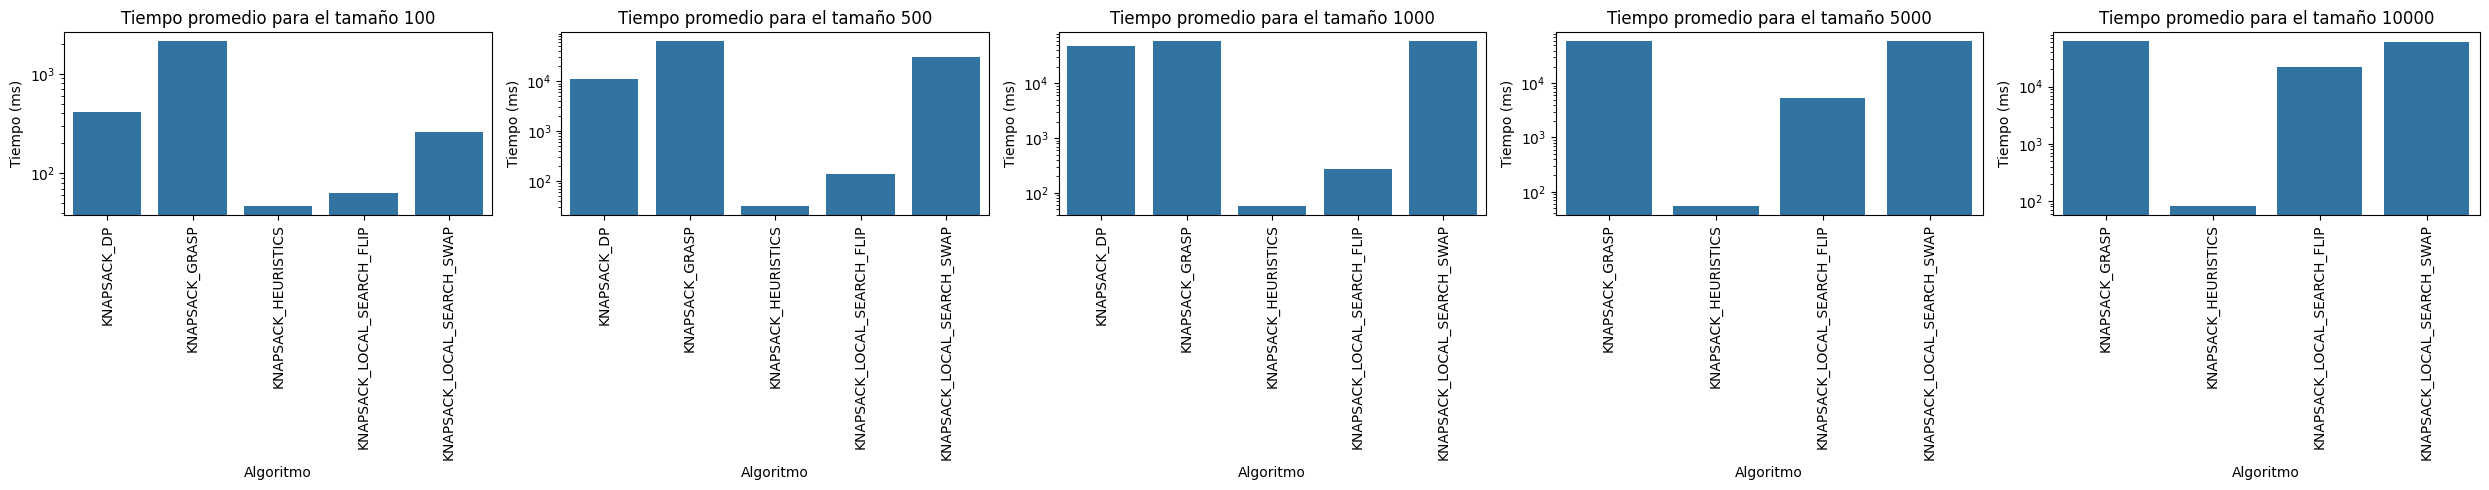

In [5]:
sizes = df['Size'].unique()
fig, axs = plt.subplots(1, len(sizes), figsize=(len(sizes)*5, 5))

for i, size in enumerate(sorted(sizes)):
    df_size = df[df['Size'] == size]
    df_size = df_size.sort_values('Algorithm')
    times = df_size.groupby('Algorithm')['Time (ms)'].mean().reset_index()

    ax = sns.barplot(x='Algorithm', y='Time (ms)', data=times, ax=axs[i])
    ax.set_title('Tiempo promedio para el tamaño ' + str(size))
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel('Tiempo (ms)')
    ax.set_yscale('log')
    ax.set_xticks(range(len(times['Algorithm'])))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


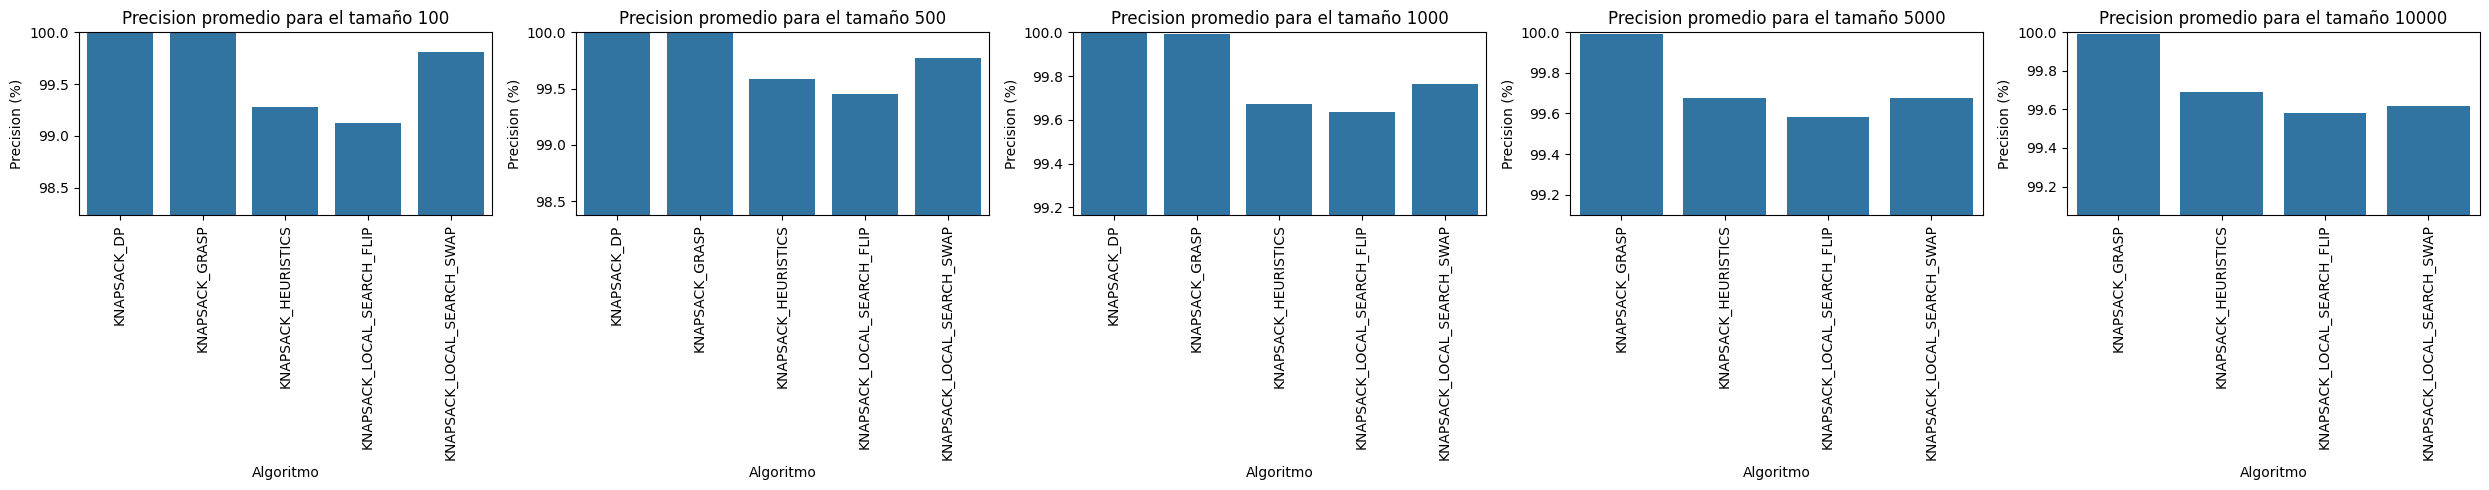

In [6]:
sizes = df['Size'].unique()
fig, axs = plt.subplots(1, len(sizes), figsize=(len(sizes)*5, 5))

for i, size in enumerate(sorted(sizes)):
    df_size = df[df['Size'] == size]
    df_size = df_size.sort_values('Algorithm')
    df_size['Accuracy (%)'] = df_size['Obtained'] / df_size['Expected'] * 100
    accuracies = df_size.groupby('Algorithm')['Accuracy (%)'].mean().reset_index()

    ax = sns.barplot(x='Algorithm', y='Accuracy (%)', data=accuracies, ax=axs[i])
    ax.set_title('Precision promedio para el tamaño ' + str(size))
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel('Precision (%)')
    ax.set_ylim([df_size['Accuracy (%)'].min(), 100])
    ax.set_xticks(range(len(accuracies['Algorithm'])))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [17]:
(df[df['Algorithm'] == 'KNAPSACK_GRASP']['Obtained'] / df[df['Algorithm'] == 'KNAPSACK_GRASP']['Expected'] * 100).mean()

99.99361965435037